## 1. Problem Statement

> Leverage recent research to develop a heart disease prediction model, paired with LLMs for user-friendly result interpretation.

## 2.Data and research used

The Original Data came from Cleaveland data from the UCI ML repo.:
    https://archive.ics.uci.edu/ml/datasets/heart+Disease

The data exploration and research on the topic that i base my further research on:

> Investigating Heart Disease Datasets and Building Predictive
Models, Brandon Simmons II
> 
    
## 3. Evaluation

> The goal is to achieve 95% accuracy in predicting whether a patient has heart disease. If this accuracy is met during the proof-of-concept phase, the project will move forward for further development.

## 4. Features
This section explains the features in the dataset and their significance.

**Feature Descriptions:**

1. Age: Patient's age in years.
2. Sex: Patient's gender (1 = male, 0 = female).
3. Chest Pain Type (cp): Type of chest pain experienced by the patient:
    0: Typical angina – pain caused by reduced blood flow to the heart.
    1: Atypical angina – pain unrelated to heart issues.
    2: Non-anginal pain – typically caused by esophageal spasms or other non-cardiac issues.
    3: Asymptomatic – no chest pain despite underlying disease.
4. Resting Blood Pressure (trestbps): Measured in mmHg at hospital admission.
    Values above 130–140 mmHg are often concerning.
5. Cholesterol (chol): Total serum cholesterol in mg/dL:
    Formula: LDL + HDL + 0.2 × triglycerides.
    Levels above 200 mg/dL may indicate risk.
6. Fasting Blood Sugar (fbs): Indicates if fasting blood sugar exceeds 120 mg/dL (1 = true, 0 = false):
    Values >126 mg/dL typically suggest diabetes.
7. Resting ECG (restecg): Results of the resting electrocardiogram:
    0: Normal results.
    1: ST-T wave abnormality (e.g., non-normal heart rhythms).
    2: Left ventricular hypertrophy – enlargement of the heart's main pumping chamber.
8. Maximum Heart Rate (thalach): Maximum heart rate achieved during exercise.
9. Exercise-Induced Angina (exang): Indicates whether angina (chest pain) occurs during exercise (1 = yes, 0 = no).
10. ST Depression (oldpeak): Measures heart stress during exercise relative to rest. Higher values indicate more stress on the heart.
11. ST Segment Slope (slope): Describes the slope of the peak exercise ST segment:
    0: Upsloping – better heart function during exercise (rare).
    1: Flat – minimal changes (indicative of a healthy heart).
    2: Downsloping – suggests heart issues.
12. Major Vessels (ca): Number of major blood vessels (0–3) visible via fluoroscopy:
Visible vessels indicate proper blood flow (fewer clots are better).
13. Thalassemia Test (thal): Results of the thalium stress test:
    1, 3: Normal.
    6: Fixed defect – past issue resolved.
    7: Reversible defect – improper blood flow during exercise.
14. Target: Indicates presence of heart disease (1 = disease, 0 = no disease). This is the variable the model predicts.

##Data prepreration and cleaning

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset (Here we use id 45 to fetch the cleveland dataset)
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [5]:
# Inspect the features and target
print("\nFirst five rows of the feature matrix:")
print(X.head())

print("\nFirst five rows of the target variable:")
print(y.head())

# Summary statistics for numerical features
print("\nSummary statistics:")
print(X.describe())

# Check for missing values
print("\nMissing values in features:")
print(X.isnull().sum())

# Check target variable distribution
print("\nTarget variable distribution:")
print(y.value_counts())


First five rows of the feature matrix:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  

First five rows of the target variable:
   num
0    0
1    2
2    1
3    0
4    0

Summary statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.9

In [6]:
# Combine features and target into a single DataFrame
df = pd.concat([X, y], axis=1)
df.columns = list(X.columns) + ['target']  # Rename target column if necessary
print("\nCombined dataset preview:")
print(df.head())


Combined dataset preview:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  target  
0  0.0   6.0       0  
1  3.0   3.0       2  
2  2.0   7.0       1  
3  0.0   3.0       0  
4  0.0   3.0       0  


In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [8]:
# Handle missing values
df.fillna(df.median(), inplace=True)  # Median for numerical, can adjust for categorical

# Remove duplicates
df.drop_duplicates(inplace=True)

# Ensure data types are correct
for col in df.columns:
    if df[col].dtype == 'object':  # Convert to category for categorical variables
        df[col] = df[col].astype('category')

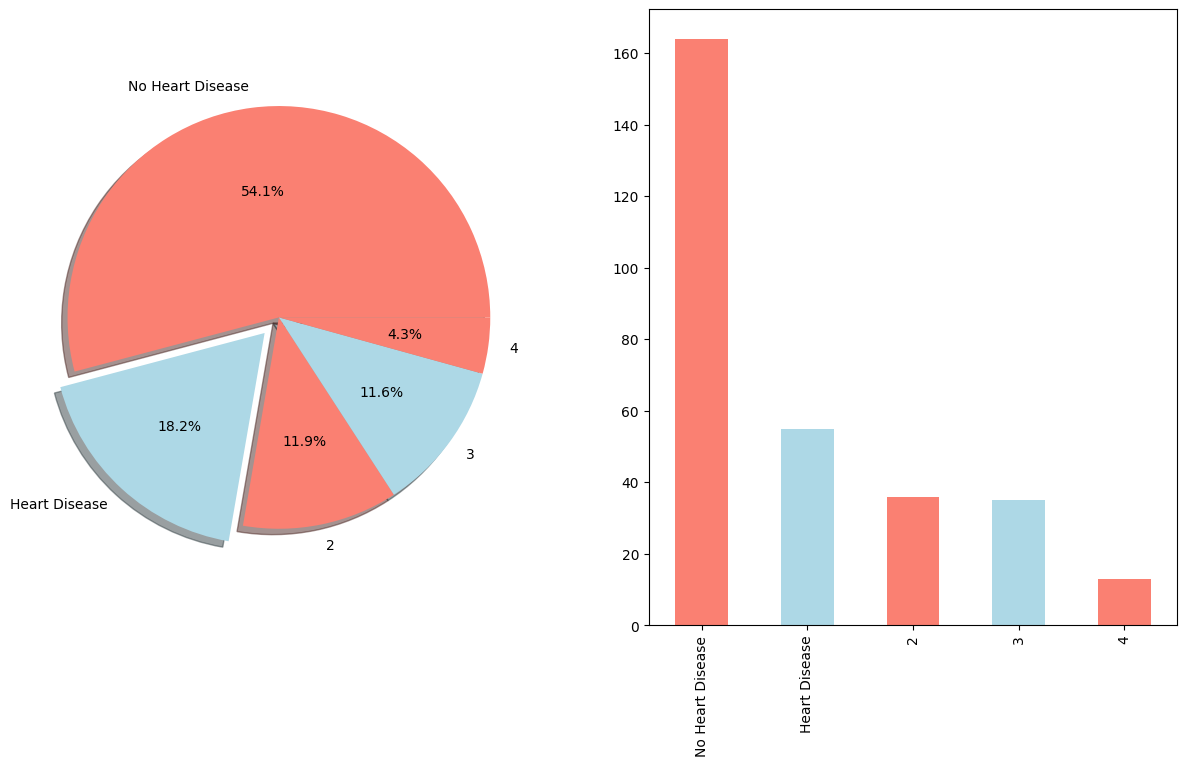

In [14]:
# Visualizing the Target
f, ax = plt.subplots(1, 2, figsize=(15, 8))
target_counts = df["target"].replace({0: "No Heart Disease", 1: "Heart Disease"}).value_counts()
explode = [0.1 if i == "Heart Disease" else 0 for i in target_counts.index]
target_counts.plot(kind="pie", colors=["salmon", "lightblue"], ax=ax[0], explode=explode, autopct='%1.1f%%', shadow=True)
ax[0].set_ylabel('')
target_counts.plot(kind="bar", ax=ax[1], color=["salmon", "lightblue"])
ax[1].set_ylabel('')
ax[1].set_xlabel('')
plt.show()

Data exploration

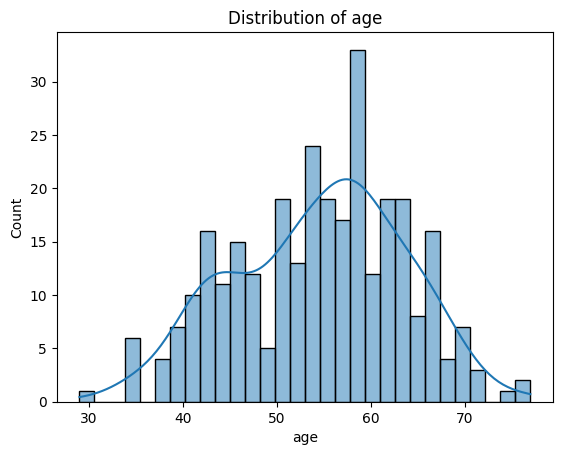

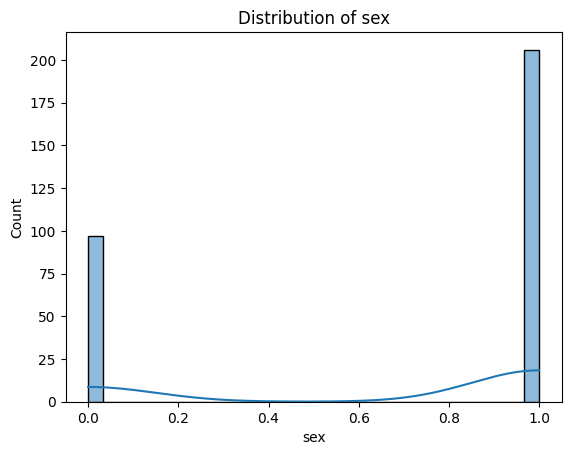

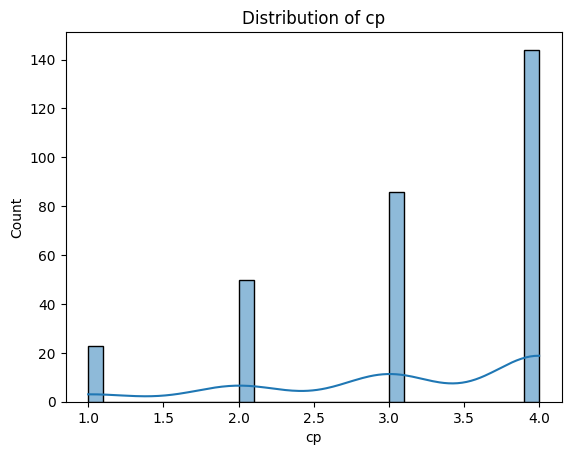

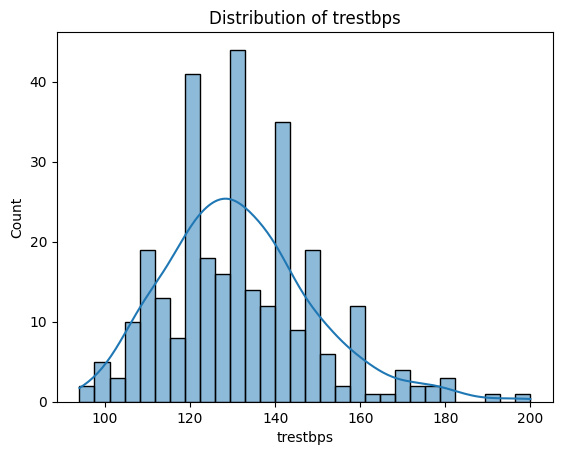

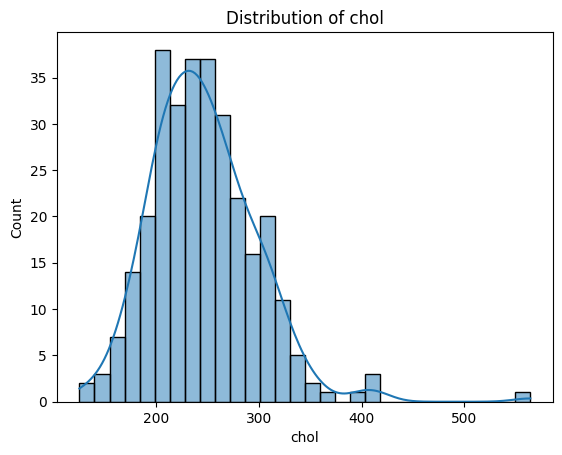

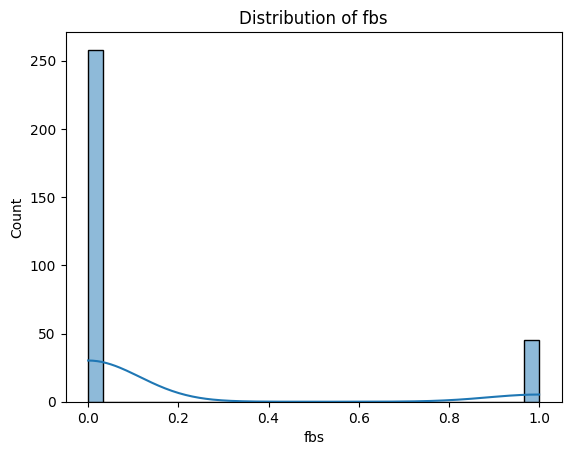

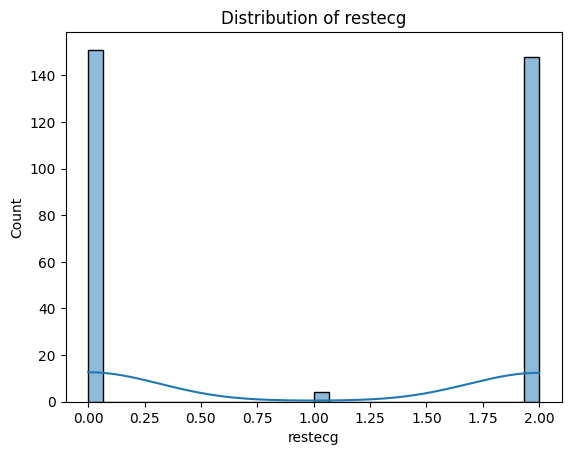

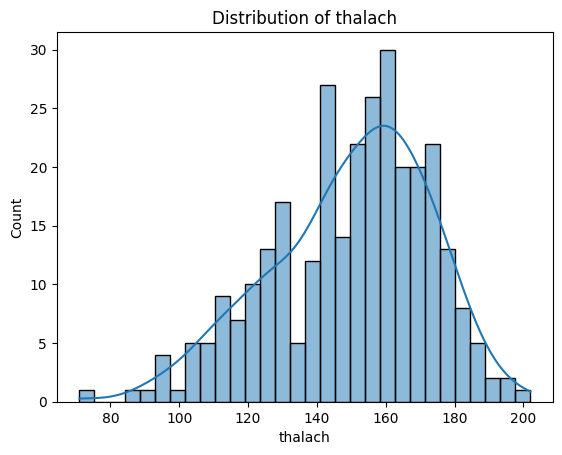

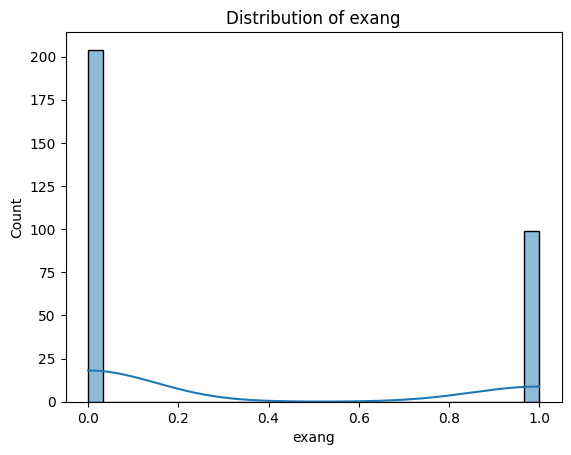

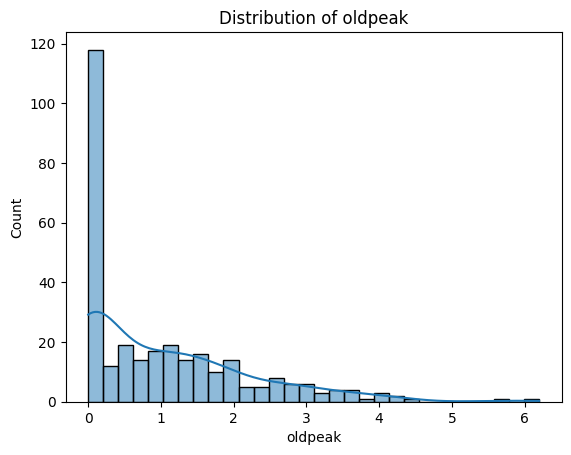

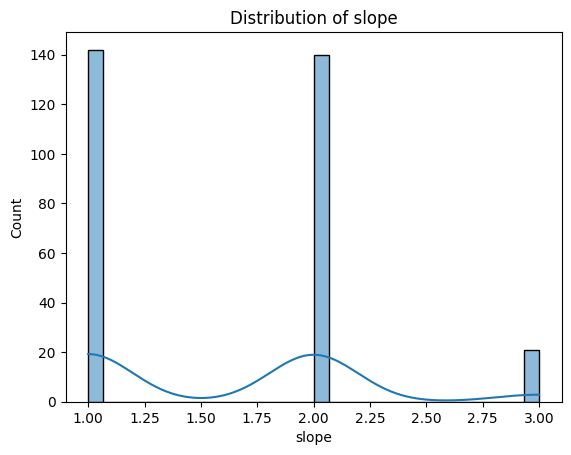

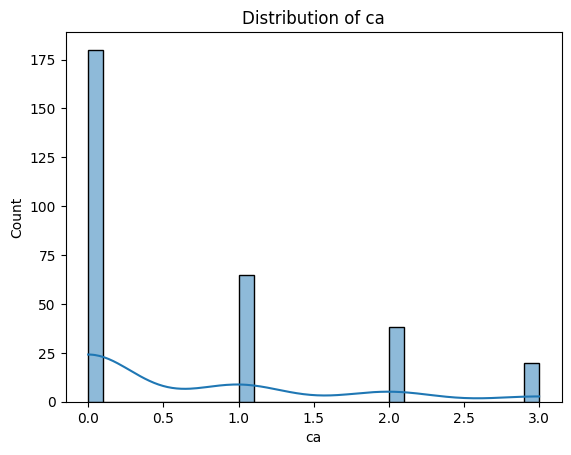

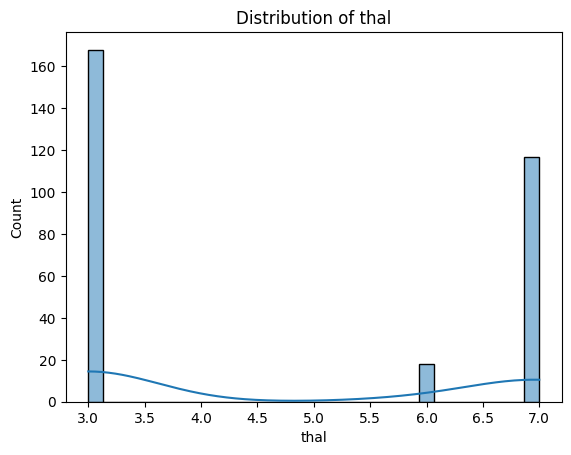

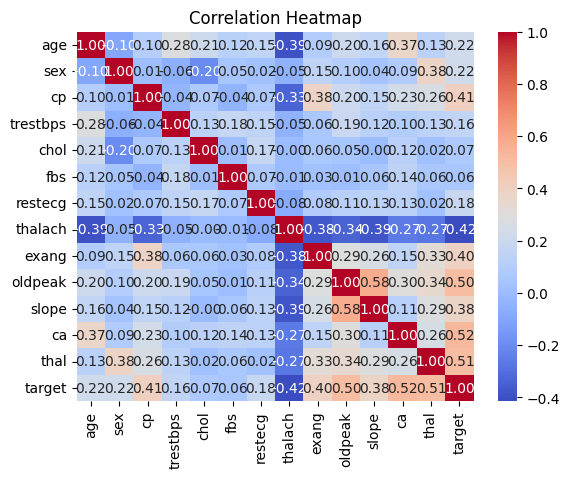

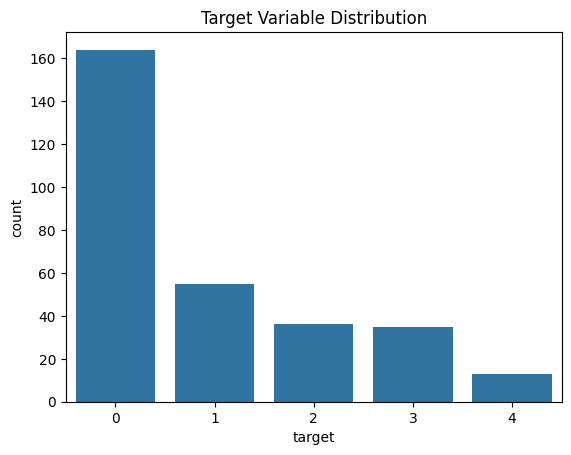

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Feature distributions
for col in df.columns:
    if df[col].dtype != 'category' and col != 'target':  # Numerical columns
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"Distribution of {col}")
        plt.show()

# Correlation heatmap for numerical features
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Target variable distribution
sns.countplot(x='target', data=df)
plt.title("Target Variable Distribution")
plt.show()

Recap of the data

1. We see that most patients are middle-aged to elderly (40–70 years), with a peak around 55–60 years.
    This aligns with typical demographics for heart disease studies.

2. The dataset is heavily male-dominated, with significantly more males than females. 
    Could be solved by 

3. The target variable distribution is imbalanced, where we in the Cleveland data documentation can see that, 0 is no heartdisease and 1-4 is heart disease with increasing severity.

4. In the correlation matrix we see the variables cp (Chest pain type), ca (number of major vessels colored), thal (Thalassemia Status) and old peak (ST depression induced by exercise) positivly correlate with our target, and thalach (maximum heart rate achieved) negativly correlating with our target.